# Changes from previous submission:
1. Added accuracy calculation for external image classification
2. Changed optimizer from GD to Adam
3. Improved data normalization to be in the range -0.5 - 0.5
4. Retrained the model and used weights with 97% accuracy
## Discussion:
To calculate the accuracy of classification on external images I manually created labels for hand picked images. I try to include both simple and difficult images in the dataset of 24 external images downloaded from the internet.
The change from GD to Adam optimizer solved a lot of problems involving learning rate that I discussed below for the first submission. It was very simple change and the results are dramatic. 
Data normalization was slightly off and was producing data with assymetric single digits range, this was fixed to properly normalize the data to the range -0.5 - 0.5 with printouts of the mean and range to verify the results. This change however did not cause any observable effect on training or classification.
And now for the results - on 24 external images the model achieved accuracy of 41%. Although it is inferior perfomance relative to the accuracy on the original test set it is encouraging to see that such a simple model with modest dataset and training recognized almost half of the pictures it has never saw from diferrent angles and diferrent backgrounds.


# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(train['features'])

# TODO: number of testing examples
n_test = len(test['features'])

# TODO: what's the shape of an image?
image_shape = train['sizes']

# TODO: how many classes are in the dataset
import csv
sign_names_file = 'signnames.csv'
n_classes = 0
sign_names = []
with open(sign_names_file, 'r') as csvfile:
    signnamereader = csv.reader(csvfile)
    for row in signnamereader:
        print(row)
        if row[0].isdigit():
            n_classes += 1
            sign_names.append(row[1])
print(len(sign_names))
            
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("train.keys = ", train.keys())
print("train[labels] = ", train['labels'])

['ClassId', 'SignName']
['0', 'Speed limit (20km/h)']
['1', 'Speed limit (30km/h)']
['2', 'Speed limit (50km/h)']
['3', 'Speed limit (60km/h)']
['4', 'Speed limit (70km/h)']
['5', 'Speed limit (80km/h)']
['6', 'End of speed limit (80km/h)']
['7', 'Speed limit (100km/h)']
['8', 'Speed limit (120km/h)']
['9', 'No passing']
['10', 'No passing for vechiles over 3.5 metric tons']
['11', 'Right-of-way at the next intersection']
['12', 'Priority road']
['13', 'Yield']
['14', 'Stop']
['15', 'No vechiles']
['16', 'Vechiles over 3.5 metric tons prohibited']
['17', 'No entry']
['18', 'General caution']
['19', 'Dangerous curve to the left']
['20', 'Dangerous curve to the right']
['21', 'Double curve']
['22', 'Bumpy road']
['23', 'Slippery road']
['24', 'Road narrows on the right']
['25', 'Road work']
['26', 'Traffic signals']
['27', 'Pedestrians']
['28', 'Children crossing']
['29', 'Bicycles crossing']
['30', 'Beware of ice/snow']
['31', 'Wild animals crossing']
['32', 'End of all speed and passin

In [3]:

### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

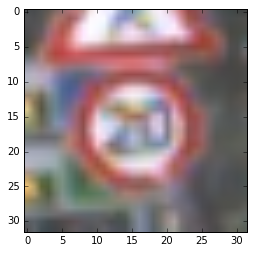

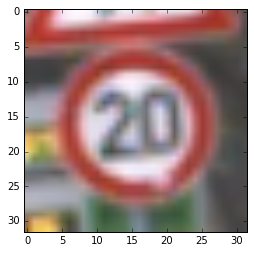

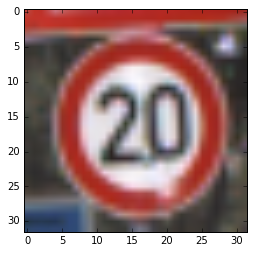

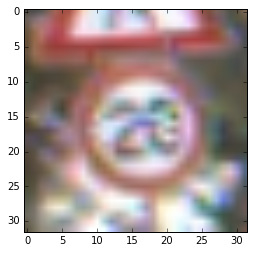

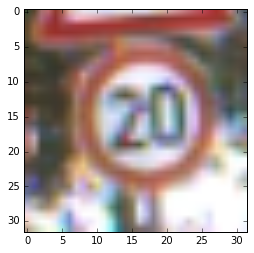

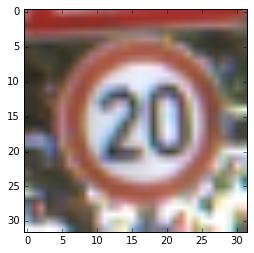

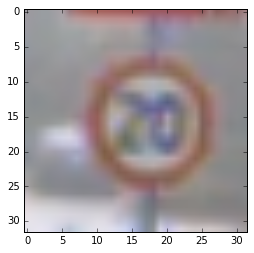

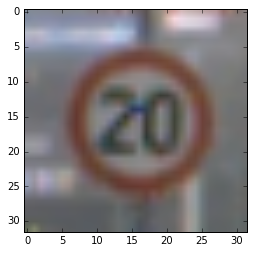

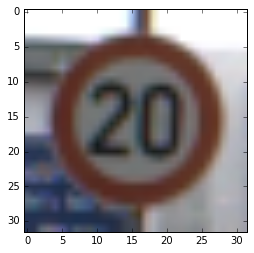

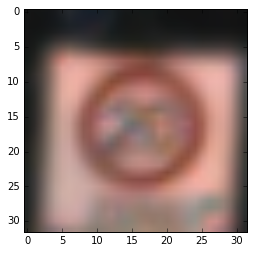

In [4]:
#show train signs:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline


for i in range(0, 100, 10):
    img = train['features'][i]
    imgplot = plt.imshow(img)
    plt.show()

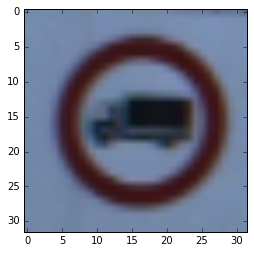

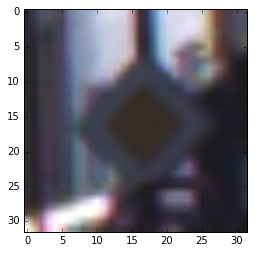

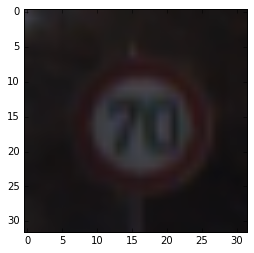

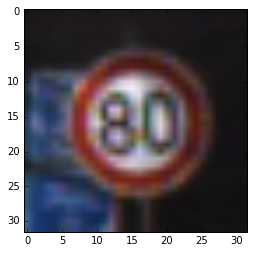

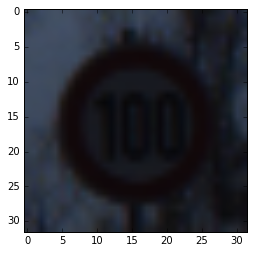

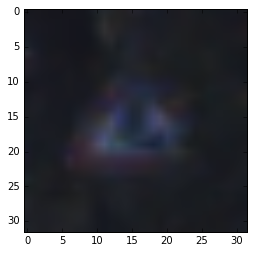

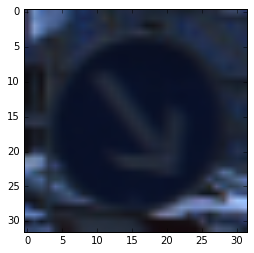

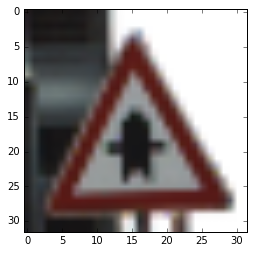

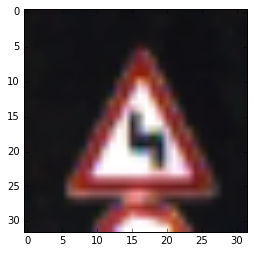

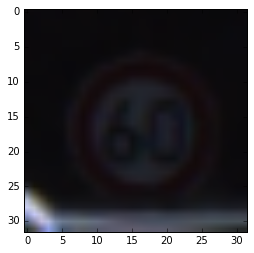

In [5]:
#show train signs:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(0, 100, 10):
    img = test['features'][i]
    imgplot = plt.imshow(img)
    plt.show()

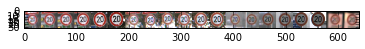

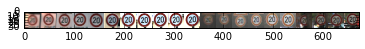

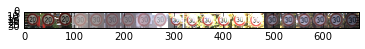

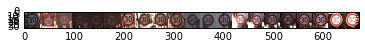

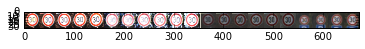

In [6]:
#combine several signs in the same image:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#From: http://stackoverflow.com/questions/30227466/combine-several-images-horizontally-with-python
def concat_images(imga, imgb):
    """
    Combines two color image ndarrays side-by-side.
    """
    ha,wa = imga.shape[:2]
    hb,wb = imgb.shape[:2]
    max_height = np.max([ha, hb])
    total_width = wa+wb
    new_img = np.zeros(shape=(max_height, total_width, 3), dtype=np.uint8)
    new_img[:ha,:wa]=imga
    new_img[:hb,wa:wa+wb]=imgb
    return new_img

images_per_row = 20
for i in range(0, 100):
    img = train['features'][i*5]
    if i == 0:
        bigimage = img
    else:
        bigimage = concat_images(bigimage, img)
    if i % images_per_row == images_per_row-1:
        imgplot = plt.imshow(bigimage)
        plt.show()
        bigimage = img
        


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [8]:
import math

def show_batch(batch_x):
    new_img = merge_batch(batch_x)
    plt.figure(figsize = (10,10))
    imgplot = plt.imshow(new_img)
    plt.show()

#assuming all images have the same shape
def merge_batch(batch_x):
    num_images = len(batch_x)
    images_per_row = int(math.sqrt(num_images))
    h,w,d = batch_x[0].shape
    print('h: ', h, ' w: ', w)
    new_shape = (h*math.ceil(num_images/images_per_row), w*images_per_row, d)
    print(new_shape)
    new_img = np.zeros(shape=new_shape, dtype=np.uint8)
    row = 0
    for i in range(num_images):
        img = batch_x[i]
        row_start =  row    * h
        row_end   = (row+1) * h
        col_start =  (i%images_per_row)    * w
        col_end   = ((i%images_per_row)+1) * w
        new_img[row_start:row_end, col_start:col_end, :] = img
        #print([row_start, row_end, col_start, col_end])
        row = int((i+1)/images_per_row)
        
    return new_img

input shape:  (39209, 32, 32, 3)
input shape:  (12630, 32, 32, 3)
train shape:  (39209, 48, 48, 3)
test shape:  (39209, 48, 48, 3)
Before histogram equalization:
h:  32  w:  32
(256, 256, 3)


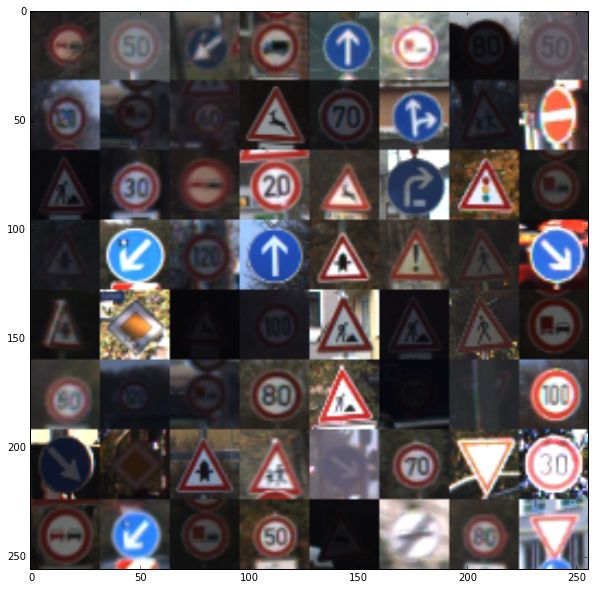

After histogram equalization:
h:  48  w:  48
(384, 384, 3)


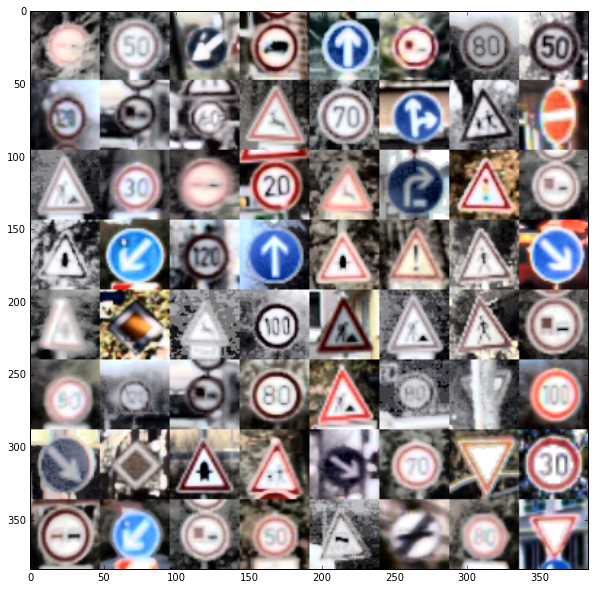

Data normalized
mean:  0.0177446
range:  -0.5  -  0.5
Data normalized
mean:  0.0182526
range:  -0.5  -  0.5
train labels shape:  (39209, 43)
test labels shape:  (12630, 43)


In [9]:
import numpy as np, cv2

target_shape = (48, 48)

def hist_eq(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    y_channel = img_yuv[:,:,0]
    equalized_y = cv2.equalizeHist(y_channel)
    img_yuv[:,:,0] = equalized_y
    new_img = cv2.cvtColor(img_yuv, cv2.COLOR_YCrCb2RGB)
    return new_img

def resize_images(images):
    print('input shape: ', images.shape)
    resized = []
    for i in range(len(images)):
        img = images[i]
        img_rsz = cv2.resize(img, target_shape)
        img_eq = hist_eq(img_rsz)
        #img_grey = cv2.cvtColor(img_rsz, cv2.COLOR_RGB2GRAY)
        #img_equ = cv2.equalizeHist(img_grey)
        resized.append(img_eq)
    return np.array(resized)

#from http://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison:
def unison_shuffled_copies(a, b, c=[]):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    if len(c) > 0:
        return a[p], b[p], c[p]
    else:
        return a[p], b[p]

resized = resize_images(train['features'])
test_resized = resize_images(test['features'])
test_disp = test_resized #for displaying later without normalization
print('train shape: ', resized.shape)
print('test shape: ', resized.shape)

p = np.random.permutation(len(resized))[:64]
print('Before histogram equalization:')
show_batch(train['features'][p])

print('After histogram equalization:')
show_batch(resized[p])

def normalize_data(data):
    data = ((data - data.min())/(np.max(data) - np.min(data)) - 0.5)
    print('Data normalized')
    print('mean: ', np.mean(data))
    print('range: ', np.min(data), ' - ', np.max(data))
    return data

resized = resized.astype('float32')
test_resized = test_resized.astype('float32')
resized = normalize_data(resized)
test_resized = normalize_data(test_resized) 

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
labels = enc.fit_transform(train['labels'].reshape(-1, 1)).toarray()
print('train labels shape: ', labels.shape)
test_labels = enc.fit_transform(test['labels'].reshape(-1, 1)).toarray()
print('test labels shape: ', test_labels.shape)
#print(labels)

#shuffle the data:
resized, labels = unison_shuffled_copies(resized, labels)
test_resized, test_labels, test_disp = unison_shuffled_copies(test_resized, test_labels, test_disp)

In [10]:
n_classes = 43  #already calculated above

In [11]:
import tensorflow as tf

layer_width = {
    'layer_1': 100,
    'layer_2': 150,
    'layer_3': 250,
    'fully_connected': 300
}

weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [7, 7, 3, layer_width['layer_1']])),
    'layer_2': tf.Variable(tf.truncated_normal(
        [4, 4, layer_width['layer_1'], layer_width['layer_2']])),
    'layer_3': tf.Variable(tf.truncated_normal(
        [4, 4, layer_width['layer_2'], layer_width['layer_3']])),
    'fully_connected': tf.Variable(tf.truncated_normal(
        [3*3*layer_width['layer_3'], layer_width['fully_connected']])),
    'out': tf.Variable(tf.truncated_normal(
        [layer_width['fully_connected'], n_classes]))
}
biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
    'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])),
    'out': tf.Variable(tf.zeros(n_classes))
}


In [12]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.dropout(x, 0.9)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

# Create model
def conv_net(x, weights, biases):
    # Layer 1
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1 = maxpool2d(conv1, k=2)
    print('conv1: ', conv1.get_shape())

    # Layer 2
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = maxpool2d(conv2, k=2)
    print('conv2: ', conv2.get_shape())

    # Layer 3
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    conv3 = maxpool2d(conv3, k=2)
    print('conv3: ', conv3.get_shape())

    # Fully connected layer
    # Reshape conv3 output to fit fully connected layer input
    fc1 = tf.reshape(
        conv3,
        [-1, weights['fully_connected'].get_shape().as_list()[0]])
    print('fc1: ', fc1.get_shape())
    fc1 = tf.add(
        tf.matmul(fc1, weights['fully_connected']),
        biases['fully_connected'])
    print('fc1: ', fc1.get_shape())
    fc1 = tf.nn.dropout(fc1, 0.9)

    # Output Layer - class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    print('out: ', out.get_shape())
    return out

In [13]:
#!sudo ldconfig /usr/local/cuda/lib64

DEBUG = 0
training_epochs = 1
batch_size = 128

# tf Graph input
x = tf.placeholder("float32", [None, target_shape[0], target_shape[1], 3], name='x')
y = tf.placeholder("float32", [None, n_classes], name='y')

logits = conv_net(x, weights, biases)
smax = tf.nn.softmax(logits)
amax = tf.argmax(smax, 1)
actual_y = tf.argmax(y, 1)

# Define loss and optimizer
cross_ent = tf.nn.softmax_cross_entropy_with_logits(logits, y)
cost = tf.reduce_mean(cross_ent)
#cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(tf.nn.softmax(logits)), reduction_indices=1))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

conv1:  (?, 21, 21, 100)
conv2:  (?, 9, 9, 150)
conv3:  (?, 3, 3, 250)
fc1:  (?, 2250)
fc1:  (?, 300)
out:  (?, 43)


In [34]:
maxacc = 0;
import tqdm
from tqdm import trange
# Launch the graph
sess = tf.Session()
with sess:
    sess.run(init)

    if DEBUG:
        w1 = sess.run(weights['layer_1'])
        #print(w1)

    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(len(resized)/batch_size)
        # Loop over all batches
        for i in trange(total_batch):
            batch_x = resized[i*batch_size:(i+1)*batch_size]
            batch_y = labels[i*batch_size:(i+1)*batch_size]
            #batch_x = test_resized[i*batch_size:(i+1)*batch_size]
            #batch_y = test_labels[i*batch_size:(i+1)*batch_size]
            
            feed_dict={x: batch_x, y: batch_y}

            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict=feed_dict)
            
        # Display logs per epoch step
        c = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
    
        # Test accuracy on the first test batch:
        test_dict = {x: test_resized[:batch_size], y: test_labels[:batch_size]}
        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float32"))
        acc = accuracy.eval(test_dict)
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "accuracy=", acc)

        # Create a saver.
        parameters = {**weights,**biases}
        saver = tf.train.Saver()
        if acc > 0.1 and acc > maxacc:
            filename = 'test-' + str(acc)
            res = saver.save(sess, filename, global_step=epoch)
            print("Parameters saved to file ", filename)
            maxacc = acc
        
    print("Optimization Finished!")
    
    # Test model
    batch_size = 128*10
    test_batches = int(len(test_resized)/batch_size)
    acc_vec = np.empty([test_batches])
    for i in trange(test_batches):
        #test_dict = {x: test_resized, y: test_labels}
        start = i*batch_size
        end = (i+1)*batch_size
        test_dict = {x: test_resized[start:end], y: test_labels[start:end]}
        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
        acc_batch_tf = tf.reduce_mean(tf.cast(correct_prediction, "float32"))
        acc_batch = acc_batch_tf.eval(test_dict)
        acc_vec[i] = acc_batch
        #print('batch accuracy: ', acc_batch)
        if i == 0:
            pred = amax.eval(test_dict)
            print('predictions: ', pred[0:16])
            actual = actual_y.eval(test_dict)
            print('actual:      ', actual[0:16])

    print('Accuracy: ', np.mean(acc_vec)) 
    


  4%|▎         | 11/306 [00:03<01:21,  3.60it/s]
Exception in thread Thread-16:
Traceback (most recent call last):
  File "/mnt/bin/anaconda3/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/mnt/bin/anaconda3/lib/python3.5/site-packages/tqdm/_tqdm.py", line 102, in run
    for instance in self.tqdm_cls._instances:
  File "/mnt/bin/anaconda3/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 306/306 [01:16<00:00,  4.06it/s]


Epoch: 0001 cost= 444686.000000000 accuracy= 0.609375
Parameters saved to file  test-0.609375
Optimization Finished!
predictions:  [ 4  4 31 35 25 39 38 22 35  6 24 25 12  6  2 15]
actual:       [ 0  9 31 35 25 40 38 18 25 28 10 25 12 32  9 15]
Accuracy:  0.568576402134


### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**
From http://cs231n.github.io/neural-networks-2/
Mean subtraction - to center the data in the range -128:128 instad of 0-255
Normalization - dividing the data by the standard deviation in order to further decrease the range of the data (ideally -1:1)
Random batch selection:
One problem I encountered from the beginning was cost=0 after the first epoch. It turned out to be that the labels in the data are sorted, and the first several hundred samples are of the same class (sign). So it is very easy for the model to choose the weights to reduce the cost to zero or in other words to overfit. The solution was to reshuffle the training data to have random classes disperesed through the array.
Histogram equalization:
Looking at the images it is clear that contrast ranges vary widely between the images. To fix it a histogram equalization was done on the Y channel of the image after converting to YUV space. After equalization the image is converted back to RGB space. Reference code is taken from: http://opencv-srf.blogspot.com/2013/08/histogram-equalization.html

Additional techniques that were not implemented:
From: http://people.idsia.ch/~juergen/nn2012traffic.pdf





### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**
I used the pickle files that were already divided to training and testing data.
Training data was feed in batches of size 128 to fit into the memory of the GPU (running on AWS).
As the model grew more complex the test data had to be divided into batches as well due to the same GPU memory constarain. Running testing predictions on small batches turned out to be very inefficient so I increased the batch size for testing and used only part of the data (two batches of 128*10 samples) for testing the model which is about 20% of the testing data.
In addition, in order to monitor approximate accuracy for each batch I implemented testing of accuracy insided the batch loop checking against one batch (128 samples) of test data. This technique helped to monitor when the model is overfitting vs underfitting by comparing the accuracy against smaller test data vs accuracy against larger test data.
I did not generate additional data since the train data already contained the same image from different angles and distortions leading to smaller effectiveness of data augmentation.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
From http://people.idsia.ch/~juergen/nn2012traffic.pdf:
After running on MNIST recognition architecture described in "Convolutional Network in TensorFlow" lesson I saw that the performance of this network on traffic-sign dataset was poor. To understand why I ran the training on test data and expected to see around 100% accuracy to validate the "remembering" ability of the network. In reality, the model wasn't able to overfit even on one batch of test data. This result led me to conclusion that the network is too small and does not have enough parameters to express the complexity of the data based on the fact that the MNIST dataset has only 10 classes whereas the traffic-sign dataset has 43 classes. To verify this theory I added one more layer to network and as expected this improved the accurary on both the test sets and train sets.
Now I needed a bigger network architecture and found that the network described in "Multi-Column Deep Neural Network for Traffic Sign Classification" (link above) was built specificly for this dataset and achieved impressive >99% accuracy. I implemented the network architechture the same way as in the paper but ommited some of the data preprocessing techniques trying to get the best results with minimal complexity. In summary, the network architecture is as follows:
Layer Type             # maps & neurons            kernel
  0   input            3 maps of 48x48 neurons
  1   convolutional    100 maps of 42x42 neurons   7x7
  2   max pooling      100 maps of 21x21 neurons   2x2
  3   convolutional    150 maps of 18x18 neurons   4x4
  4   max pooling      150 maps of 9x9 neurons     2x2
  5   convolutional    250 maps of 6x6 neurons     4x4
  6   max pooling      250 maps of 3x3 neurons     2x2
  7   fully connected  300 neurons                 1x1
  8   fully connected  43 neurons                  1x1

Deviations from the original architecture:
activation functions were replaced by dropout instead of relu


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
learning rate:
One of the first problems that I had to tackle was cost going to 0 or NaN after the first epoch. By experimenting I found out that decreasing the learning rate solves this problem. Later I had to decrease the learning rate again when the same problem reoccured, usually after increasing the complexity of the model. Current model uses learning rate of 0.000001
batch size:
The default batch size of 128 worked for me, fitting in the GPU memory. I experimented with bigger batch sizes but did not observe significant differences in performance.
dropout:
Started with the value of 0.9, planning to experiment with other values
epochs:
I used the following heuristic to estimate the number of epochs - when training on test dataset the model takes between 100-200 epochs to "learn" the dataset, which should be enough also for training on training data. For experimentation I used 10-20 epochs and small subset of the data (10 batches of 128) to decide whether a specific change worthwhile to run on more training data. The changes that looked promising were run on 20, 50 and all batches of training data for 50-100 epochs.
type of optimizer:
Used the default GradientDescentOptimizer, planning to experiment with other (AdagradOptimizer)


### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**
In general I chose a specific problem to tackle, for example cost is Nan, googled for potential causes to the problem and tried the proposed solutions until the problem was resolved. Sometimes the solutions required learning more about tensorflow and sizes of hidden layers for example when migrating to bigger models.
More specifically, I divided the work to several stages with goals for each one.
Stage 1 - Run simple model that learns something (increased accuracy as training). Accomplished by using the MNIST CNN from the lesson after tweaking the learning rate and reshufling the data)
Stage 2 - Expand the model, achieve 50% accuracy. Accomplished by expanding the model to receive 3 color channels instead of 1 and adding aditional convolutional layer.
Stage 3 - Migrate to larger model, achieve 80% accuracy. Accomplished by replacing the relu activation functions with dropout. This change significantly improved the accuracy.
Stage 4 - Add load/save feature to the model, test on external images. Tensorflow Saver is difficult to work with and is best when loading the model on the same notebook with variables aready defined. I did just that and it worked for me. Used this approach to load the weights later to run on external images.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

25
no-vehicles.jpg
images (8).jpg
images (16).jpg
double-curve.jpg
images.png
images (7).jpg
images (19).jpg
no-entryjpg.jpg
30kmh.jpg
images (2).png
roundabout-mandatory.jpg
stop.jpg
bumpy-road.jpg
images (10).jpg
slippery-road.jpg
20kmh.jpg
images (9).jpg
images (4).jpg
images (15).jpg
images (13).jpg
images (12).jpg
images (3).jpg
60kmh.jpg
images (6).jpg
h:  48  w:  48
(288, 192, 3)


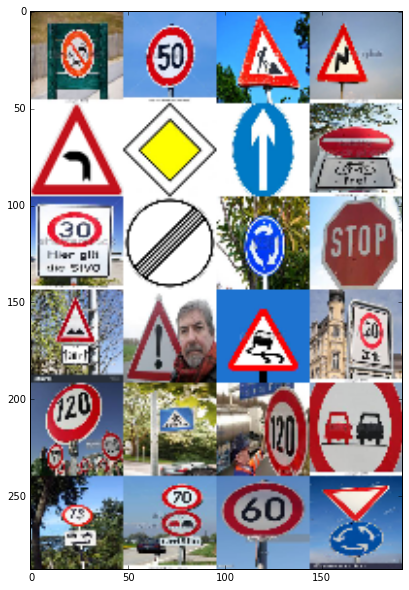

In [26]:
#load images from disk:
img_dir_name = 'images/'
from os import listdir
from os.path import isfile, join
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
onlyfiles = [f for f in listdir(img_dir_name) if isfile(join(img_dir_name, f))]
print(len(onlyfiles))


%matplotlib inline

import numpy as np
import cv2
target_shape = (48, 48)

num_images = len(onlyfiles)
images = np.empty([num_images, target_shape[0], target_shape[1], 3])
for i in range(num_images):
    filename = onlyfiles[i]
    # Load an color image in grayscale
    img = cv2.imread(''.join([img_dir_name, filename]), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_rsz = cv2.resize(img, target_shape)
    images[i] = img_rsz

print('\n'.join(onlyfiles[:24]))
show_batch(images[:24])
#show train signs:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

labels = [15, 2, 25, 21,
          19, 12, 35, 17, 
          1, 32, 40, 14,
          22, 18, 23, 0,
          8, 27, 8, 9,   
          4, 4, 3, 13]


input shape:  (24, 48, 48, 3)
Before histogram equalization:
h:  48  w:  48
(240, 240, 3)


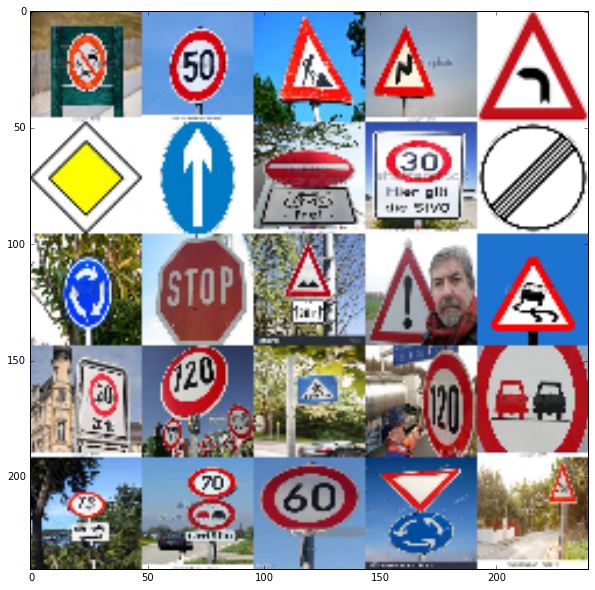

After histogram equalization:
h:  48  w:  48
(288, 192, 3)


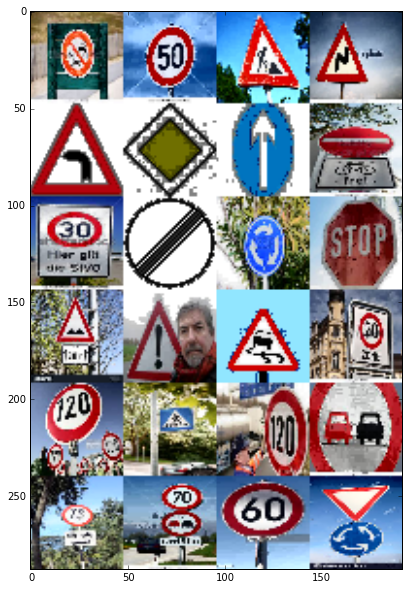

Data normalized
mean:  0.0524801
range:  -0.5  -  0.5


In [32]:
#preprocess the test data:
ext_resized = resize_images(images[:24].astype('uint8'))
ext_disp = ext_resized #for displaying later without normalization
ext_resized = ext_resized.astype('float32')

print('Before histogram equalization:')
show_batch(images)

print('After histogram equalization:')
show_batch(ext_resized)

#Normalization -0.5 - 0.5
ext_resized = normalize_data(ext_resized)


(24, 48, 48, 3)
(24, 43)
Model restored.
Accuracy:  0.416667
(24, 48, 48, 3)
predictions:  [8, 2, 24, 14, 19, 12, 35, 10, 9, 32, 40, 8, 19, 18, 23, 8, 9, 20, 3, 11, 28, 25, 9, 34]
prediction: ( 8 )  Speed limit (120km/h)
true label: ( 15 )  No vechiles


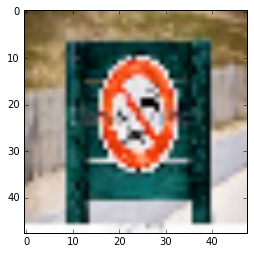

prediction: ( 2 )  Speed limit (50km/h)
true label: ( 2 )  Speed limit (50km/h)


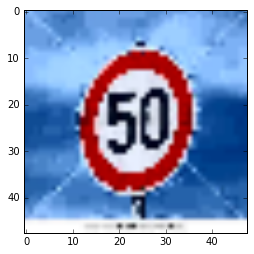

prediction: ( 24 )  Road narrows on the right
true label: ( 25 )  Road work


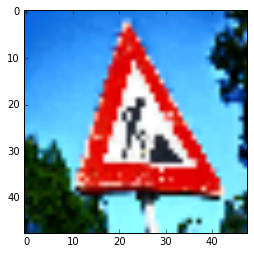

prediction: ( 14 )  Stop
true label: ( 21 )  Double curve


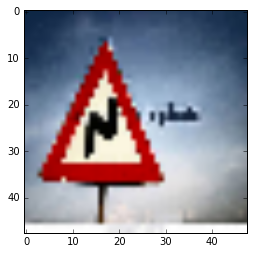

prediction: ( 19 )  Dangerous curve to the left
true label: ( 19 )  Dangerous curve to the left


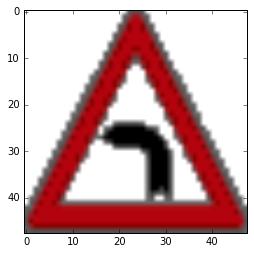

prediction: ( 12 )  Priority road
true label: ( 12 )  Priority road


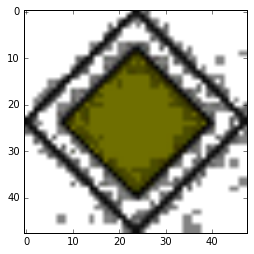

prediction: ( 35 )  Ahead only
true label: ( 35 )  Ahead only


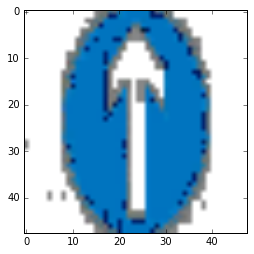

prediction: ( 10 )  No passing for vechiles over 3.5 metric tons
true label: ( 17 )  No entry


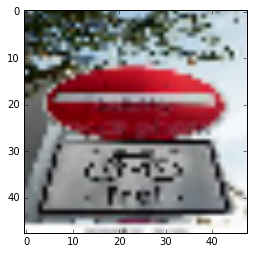

prediction: ( 9 )  No passing
true label: ( 1 )  Speed limit (30km/h)


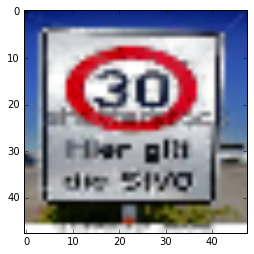

prediction: ( 32 )  End of all speed and passing limits
true label: ( 32 )  End of all speed and passing limits


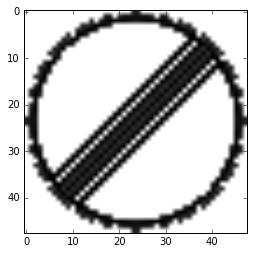

prediction: ( 40 )  Roundabout mandatory
true label: ( 40 )  Roundabout mandatory


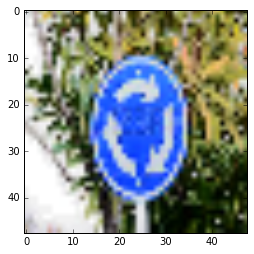

prediction: ( 8 )  Speed limit (120km/h)
true label: ( 14 )  Stop


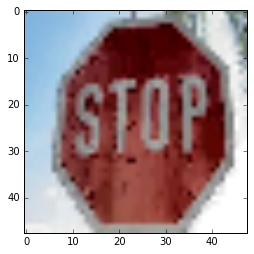

prediction: ( 19 )  Dangerous curve to the left
true label: ( 22 )  Bumpy road


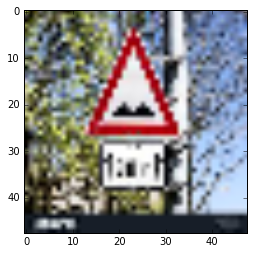

prediction: ( 18 )  General caution
true label: ( 18 )  General caution


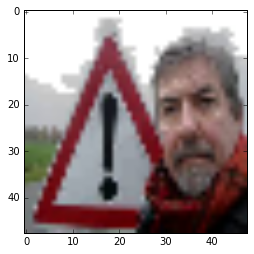

prediction: ( 23 )  Slippery road
true label: ( 23 )  Slippery road


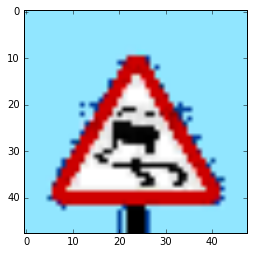

prediction: ( 8 )  Speed limit (120km/h)
true label: ( 0 )  Speed limit (20km/h)


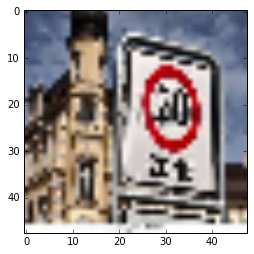

prediction: ( 9 )  No passing
true label: ( 8 )  Speed limit (120km/h)


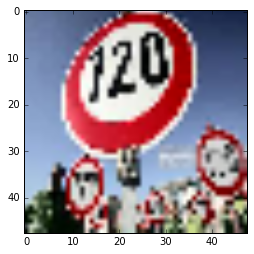

prediction: ( 20 )  Dangerous curve to the right
true label: ( 27 )  Pedestrians


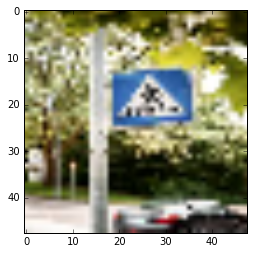

prediction: ( 3 )  Speed limit (60km/h)
true label: ( 8 )  Speed limit (120km/h)


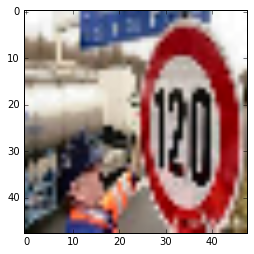

prediction: ( 11 )  Right-of-way at the next intersection
true label: ( 9 )  No passing


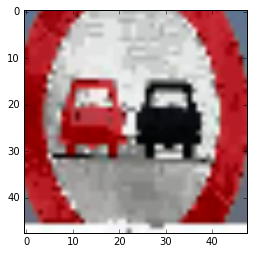

prediction: ( 28 )  Children crossing
true label: ( 4 )  Speed limit (70km/h)


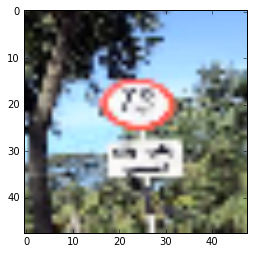

prediction: ( 25 )  Road work
true label: ( 4 )  Speed limit (70km/h)


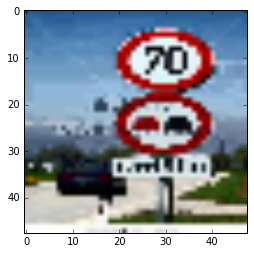

prediction: ( 9 )  No passing
true label: ( 3 )  Speed limit (60km/h)


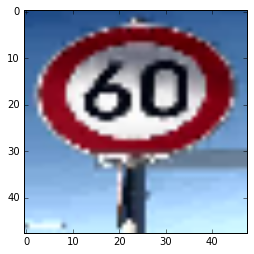

prediction: ( 34 )  Turn left ahead
true label: ( 13 )  Yield


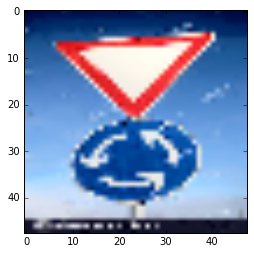

In [33]:
init = tf.initialize_all_variables()

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(n_values=n_classes)
labels = np.array(labels)
oh_labels = enc.fit_transform(labels.reshape(-1, 1)).toarray()

print(ext_resized.shape)
print(oh_labels.shape)

with tf.Session() as sess:
    # Initialize variables
    sess.run(init)
    saver = tf.train.Saver()
    saver.restore(sess, 'dropout-all-acc-adam-0.976562-90')

    print('Model restored.')

    test_dict = {x: ext_resized, y: oh_labels}
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    acc_tf = tf.reduce_mean(tf.cast(correct_prediction, "float32"))
    accuracy = acc_tf.eval(test_dict)
    print('Accuracy: ', accuracy) 

    print(ext_resized.shape)
    pred = sess.run(smax, feed_dict={x: ext_resized})
    pred_cat = [np.argmax(onehot) for onehot in pred]
    print('predictions: ', pred_cat)
    for i in range(len(pred_cat)):
        pred = pred_cat[i]
        print('prediction: (', pred, ') ', sign_names[pred])
        print('true label: (', labels[i], ') ', sign_names[labels[i]])
        img = ext_disp[i]
        imgplot = plt.imshow(img)
        plt.show()
        
    

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**
Below are plots of mismatches in the first 50 samples of test data. For each mismatch the picture in question is presented, then 16 more examples of pictures with the predicted label and below that 16 examples of pictures with the true label.
Some of the mismatched images are truely hard to recognize (like the first image below), even for a human so I don't expect the model to do well on those.
Another part of mismatches reveleas interesting analogies:
The second mismatch gives more significance to the yellowish color on the image rather than to the triangular shape and predicts a label with large yellow area. In this case running the model on greyscale images might help.
The third mismatch correctly recognizes two parralel features in a red triangle but confuses them for children instead of lanes. This looks like a model resolution issue and bigger or more thoroughly trained model might help.
In the fourth mismatch it looks like the model gives significance to the darker area that appears on the right edge of the image and also on most of the 'left turn' images that are of the class that the model predicted. The situation is worsened because most of the images of the true class (work ahead) have bright edges. Interesting question here is how to modify the model to give more significance to the shape rather than background or color features
Finally the last mismatch has very unclear number so even for a human it is difficult to recognize however it did recognize the shape and predicted one of the speed restriction signs.


In [ ]:
#returns an image with the specified lablel
#labels are array of one hot encoded (?, 43) and label is a number (0-42)
def get_img_by_label(images, labels, label):
    subarr = []
    #extract all elements with the specified label
    for i in range(len(images)):
        if np.argmax(labels[i]) != label:
            continue
        subarr.append(images[i])
    #randomly select one element from subarr:
    subarr = np.array(subarr)
    idx = np.random.random_integers(0, subarr.shape[0]-1, 16)
    return subarr[idx]
        
test_size = 50
### Run the predictions here.
sess = tf.Session()
with sess:
    # Initialize variables
    sess.run(init)
    saver.restore(sess, 'dropout-all-acc-0.90625-36')
    print('Model restored.')

    #create feed dictionary from test data
    test_dict = {x: test_resized[:test_size], y: test_labels[:test_size]}
    print('test size = ', test_size)
    pred = sess.run(smax, feed_dict=test_dict)

    for i in range(len(pred)):
        # mismatch:
        if np.argmax(pred[i]) != np.argmax(test_labels[i]):
            #Show prediction
            pred_signnum = np.argmax(pred[i])
            print('Prediction: (', pred_signnum, ') ', sign_names[pred_signnum])
            img = test_disp[i]
            imgplot = plt.imshow(img)
            plt.show()
            
            #Show more examples of the predicted label
            print('More examples of label (', pred_signnum, '):')
            imgs = get_img_by_label(test_disp, test_labels, pred_signnum)
            show_batch(imgs)
            
            #Show true label and sign examples
            true_signnum = np.argmax(test_labels[i])
            print('True label: (', true_signnum, ') ', sign_names[true_signnum])
            imgs = get_img_by_label(test_disp, test_labels, true_signnum)
            show_batch(imgs)


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**
To test that I downloaded few dozen photos of traffic signs using google search query "traffic sign germany". Besides the fact that some signs are not in the trained dataset, looks like the model did not perform well in general. 
One specific problem is illustrated by inability to recognize images that appear to be streched or from a strange angle, even if the image itself is fairly clear (see exaple of 120km/h sign two cells above). This can be improved by peforming data augmentation on the existing dataset that includes rotations, projections and other deformations of the same image.
In other cases more than one sign appeared on the image and the fact that the model is too confident about it's predictions that was discovered above is not helping.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**
From the printouts below it looks like the model is very confident in it's prediction - all of the first 100 test samples got 100% confidence for the first prediction and 0 for others. I also ran search for non-100% predictions on 1000 first samples (more than that requires batching) and found none. 
In general it is not a good thing since in reality some images are ambiguous and the model should reflect that. I am planning to investigate this issue further.

In [ ]:
top_five = tf.nn.top_k(smax, k=5, sorted=True, name='topFive')
sess = tf.Session()
with sess:
    # Initialize variables
    sess.run(init)
    filename = 'dropout-all-acc-0.90625-36'
    saver.restore(sess, filename)
    print('Model restored from file ', filename)

    test_dict = {x: test_resized[:100]}
    top5_pred = sess.run(top_five, feed_dict=test_dict)
    print('Top 5 prediction confidence levels for 100 first test samples: ')
    #unsure = [t5 for tf in top5_pred[0] if tf[1] != 0]
    #print(unsure)
    print(top5_pred[0])
    pred = sess.run(smax, feed_dict=test_dict)
    #print(pred)


### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**
I used os module to list all the files in specific directory where I placed the new images and then openCV imread to load the images one by one from the files to an array. The rest of the pipeline is identical to the training data preprocessing - resizing, histogram equalization and normalization. Now the new images are ready to be fed to the trained prediction model. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.